### Outline
  - **Uses/necessity of matplotlib**
  - Tencent Use Case
  - **Anatomy**
    - Figure    
  - Types of Data visualization
  - Univariate Data Visualization
    - Categorical:
      - Bar chart
      - Countplot
      - Pie Chart
    - Continous
      - Histogram
      - KDE
      - Box and Whiskers Plot
  - Bivariate
      - Continous-Continous
        - Line plot
        - Styling and Labelling
        - Scatterplot



### Importing Matplotlib and Seaborn 




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Video Games Analysis

You are a data scientist at "Tencent Games". \

You need to analyze what kind of games they should start creating to get higher success in the market. \


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2023-02-10 11:10:00--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.46, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  12.3MB/s    in 0.2s    

2023-02-10 11:10:00 (12.3 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


If you notice, 

- Columns like `Platform`, `Genre` are categorical
- While columns like `NA_Sales`, `Global_Sales`, `Rank` are continuous 

On noticing further,
- `Platform` is of nominal type, no proper order between the categories
- `Year` is of ordinal type, there's a order to the categories

### Introduction to Matplotlib

#### Lets learn to create a basic plot using plt

Now say, we want to draw a curve passing through 3 points:
  - (0, 3)
  - (1, 5)
  - (2, 9)

#### How can we draw a curve using matplotlib ?

By using `plt.plot() function`

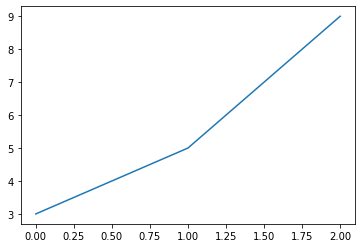

In [ ]:
x_val = [0, 1, 2]
y_val = [3, 5, 9]
plt.plot(x_val, y_val)

#### What can we observe from this plot ?
  
  - `plt.plot()` automatically decided the scale of the plot
  
  - It also prints the **type of object** `matplotlib.lines.Line2D`

While this command decided a lot of things for you, you can customise each of these by understanding **components of a matplotlib plot**




## Anatomy of Matplotlib

<!-- <img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/567/original/image_2022-11-10_121820129.png?1668062911"> -->


<!-- <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" />
<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/579/original/image_2022-11-10_150131378.png?1668072693"> -->

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/615/original/image_2022-11-11_112008033.png?1668145811">

Woah! There is a lot of information in this image. Let's understand them one at a time.


- Figure: The **overall window** or page that everything is drawn on.
  - You can create multiple independent Figures in Jupyter.
  - If you run the code in terminal, separate windows will pop-up

- Axes: To the figure you can add multiple **Axes** which represents a plot
- **Axis**: Simply the `x-axis` and `y-axis`
- **Axes**: - It is the **area** on which the **data is plotted** with functions such as `plot()`
    - **x-label**: Name of x-axis
    - **y-label**: Name of y-axis 
    - **Major ticks**: subdivides the axis into major units. They appear by default during plotting
- **Minor ticks**: subdivides the major tick units. They are by default hidden and can be toggled on.
- **Title**: Title of each plot **(Axes)**, giving information about the same
- **Legend**: describes the elements in the plot, blue and green curves in this case
- **Suptitle**: The common title of all the plots


These are the major components of a matplotlib plot

#### Now, how to choose the right plot?

Firstly, depends on the what is your question of interest

When the question is clear:
- How many variables are involved?
- Whether the variable(s) are numerical or categorical?

#### How many variables are involved?

- 1 Variable      - Univariate Analysis
- 2 Variables    - Bivariate Analysis
- 2+ Variables  - Multivariate Analysis
     
PS: Bivariate counts under multivariate, but let's keep it sep for ease of communication

What are the possible cases?

#### Univariate 
- Numerical
- Categorical

#### Bivariate
- Numerical-Numerical
- Numerical-Categorical
- Categorical-Categorical

#### Multivariate
	 
Let’s start with 3 and then we can generalize

- Numerical-Numerical-Categorical
- Categorical-Categorical-Numerical
- Categorical-Categorical-Categorical
- Numerical-Numerical-Numerical


We will work on these one by one 

## Univariate Data Visualization - Categorical Data


#### What kind of questions we may want to ask for a categorical variable?


Questions like:

- What is the Distribution/Frequency of the data across different categories?
- What proportion does a particular category constitutes?


<!-- - What are the top-5 most popular genre of games played?
- Or distribution of sales across various parts of the world? -->

...and so on




Let's take the categorical column "Genre"

#### How can we find the top-5 genres?

Recall, how could we get this data using pandas?



In [ ]:
cat_counts = data['Genre'].value_counts()
cat_counts

Action          3316
Sports          2400
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

#### Now what kind of plot can we use to visualize this information?

- We can perhaps plot categories on X-axis and their corresponding frequencies on Y-axis
- Such chart is called a Bar Chart or a Count Plot
- Can also plot horizontally when the #categories are many


### Bar Chart

The data is binned here into categories

#### How can we draw a Bar plot ?
Using `plt.bar()`



<BarContainer object of 12 artists>

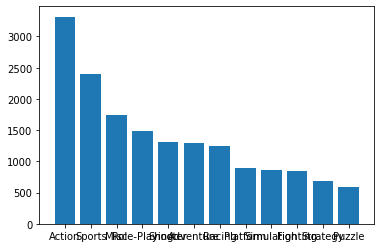

In [ ]:
x_bar=cat_counts.index
y_bar=cat_counts
plt.bar(x_bar,y_bar)

The names seem to be overlapping a lot

#### How can we handle overlapping labels?
- Maybe decrease the font size (not preferred though)
- Or maybe increase the figure size
- Or rotate the labels

#### How can we change the plot size?

<BarContainer object of 12 artists>

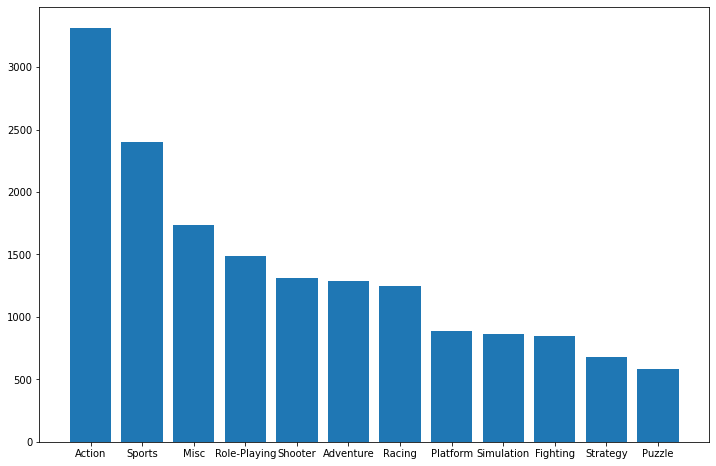

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar)

#### And how can we rotate the tick labels, also maybe increase the fontsize of the same?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

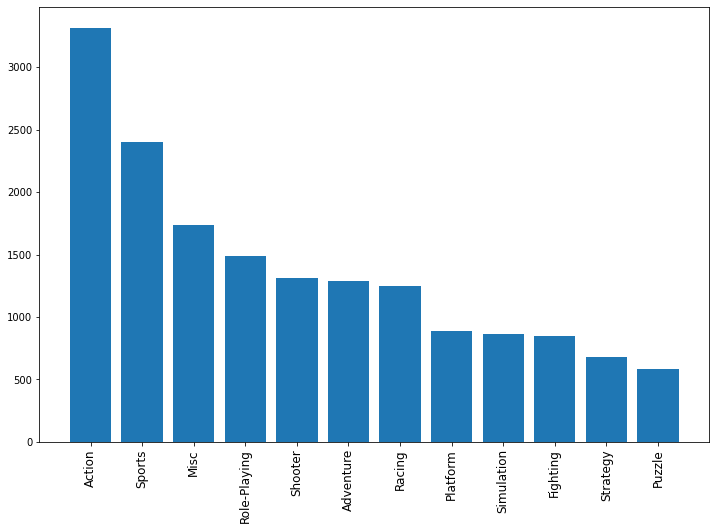

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar)
plt.xticks(rotation=90, fontsize=12)

If you notice, the width of each bar is **1**

#### Can we change the width of these bars?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

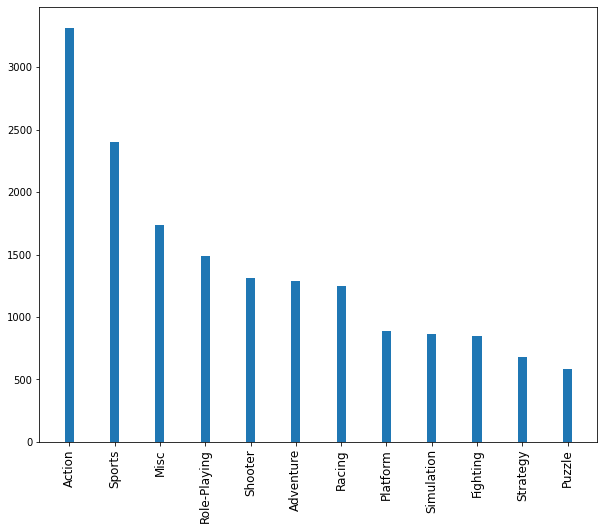

In [ ]:
# same code
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.2)
plt.xticks(rotation = 90, fontsize=12)

#### What about any additional styling to add to the bars ?

  - We can **change colour of bars**
  - We can add a **title to the axes**
  - We can also add x and y labels


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

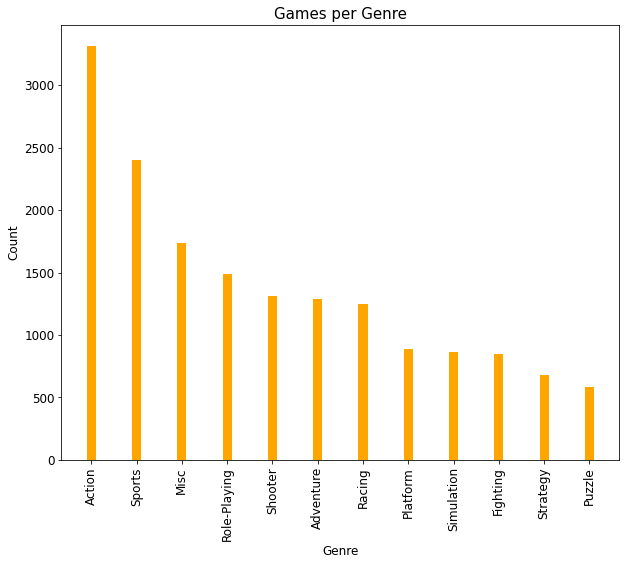

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.2,color='orange')
plt.title('Games per Genre',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)

If you notice, there's some text printed always before the plots. 

This contains the data information of the plot

#### How can we remove the text printed before the plot and just display the plot?

Using plt.show() at the end

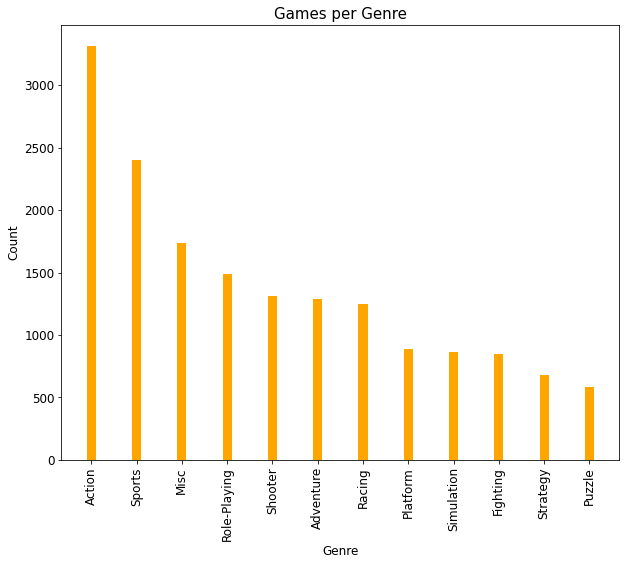

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.2,color='orange')
plt.title('Games per Genre',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### How can we draw a bar-chart in Seaborn?

- In Seaborn, the same plot is called as **countplot**.
- Countplot automtically does even the counting of frequencies for you

#### Why not called a barplot?
There is **another function** in Seaborn called **barplot which has some other purpose** - discuss later

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

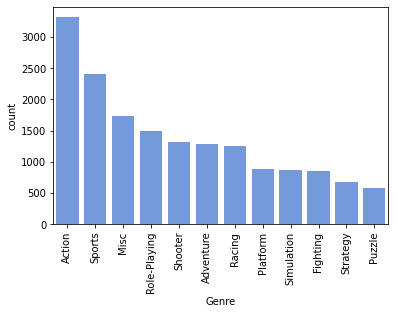

In [ ]:
sns.countplot(x = 'Genre', data = data, order=data['Genre'].value_counts().index, color='cornflowerblue')
plt.xticks(rotation=90)

The top 5 genres are action, sports, misc, role player, and shooter

### Pie charts

#### What if instead of actual frequencues, I want see the proportion of the categories with each other?

Say, we want to compare the distrubution/proportion of sales across the different regions?

Which plot can we use for this?

A pie-chart!

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/280/original/download.png?1670819443)

Do refer to the postread for the code of how to plot the pie-chart

## Univariate Data Visualisation - Numerical Data



#### What kind of questions we may have regarding a numerical variable?

1. How is the data distributed? Say distribution of number of games published in a year.
2. Is the data skewed? Are there any outliers? - Extremely high selling games maybe?
3. How much percentage of data is below/above a certain number?
4. Some special numbers - Min, Max, Mean, Median, nth percentile?



Now say, you want find the distribution of games released every year.

Unlike barplot, **to see the distribution we will need to `bin` the data**.


#### How can we understand popularity of video games year by year?


#### Histogram


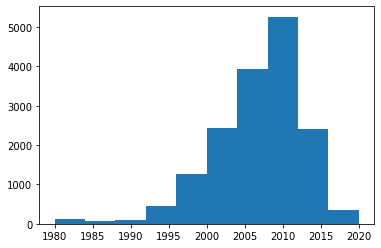

In [ ]:
plt.hist(data['Year'])
plt.show()

- The curve is left skewed, with a lot more games being published in 2005-2015

- This shows that games started being highly popular in the last 1-2 decades, maybe could point to increased usage of internet worldwide!

If you notice, histograms are basically frequency charts

We can also vary the number of bins, the **default number of bins is 10**

So if we would need to see this data per decade, we would need 40 years in 4 bins.

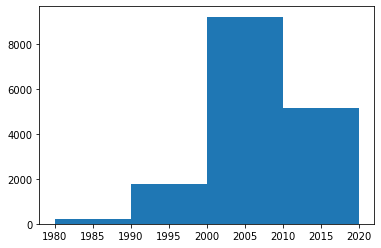

In [ ]:
plt.hist(data['Year'], bins=4)
plt.show()

We can also get the data of each bin, such as range of the boundaries, values, etc.

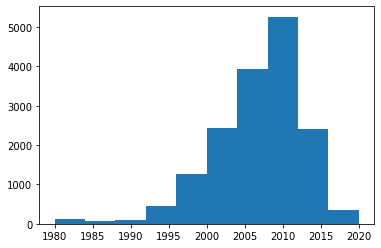

In [ ]:
count, bins, _ = plt.hist(data['Year'])

In [ ]:
count

array([ 112.,   70.,   92.,  449., 1274., 2440., 3921., 5262., 2406.,
        355.])

In [ ]:
bins

array([1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008., 2012.,
       2016., 2020.])

#### Now what do these `count` and `bins` mean?

- **bins** provides bin edges
- **counts** provides it corresponding counts


#### What is the length of `count`?

10
#### What shoud be the length of `bins`?

10 + 1 = 11

##### How can we plot histogram in Seaborn?

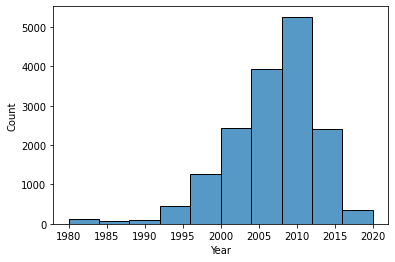

In [ ]:
sns.histplot(data['Year'], bins=10)

Notice,

- The boundaries are more defined than matplotlib's plotting
- The x and y axis are labelled automatically

### Kernel Density Estimate (KDE) Plot

- A KDE plot, similar to histrogram, is a method for visualizing the distributions


- But instead of bars, KDE represents data using a **continuous probability density curve**



#### Now, Why do we even need KDE plots?

- Compared to histogram, KDE produces a plot which is **less cluttered** and **more interpretable**
- Think of it as a **smoothened version** of histogram


<!-- - Especially when drawing multiple distributions.  -->

Let's plot KDE using `seaborn`'s `kdeplot`

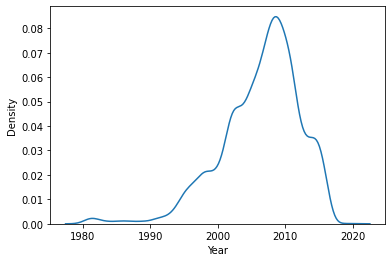

In [ ]:
sns.kdeplot(data['Year'])

#### Can you notice the difference between KDE and histogram?

Y-Axis has **probability density estimation** instead of count

You can read more about this on: 

https://en.wikipedia.org/wiki/Kernel_density_estimation \
https://www.youtube.com/watch?v=DCgPRaIDYXA



### Boxplot

Now say I want to find the typical earnings of a game when it is published.

Or maybe find the aggregates like median, min, max and percentiles of the data.


#### What kind of plot can we use to understand the typical earnings from a game?
Box Plot





#### What exactly is a Box Plot?
- A box plot or **box-and-whisker plot** shows the **distribution of quantitative data** 
- It facilitates comparisons between 
  - attributes 
  - across levels
of a categorical attribute. 


The **box**: Shows the **quartiles** of the dataset 

The **whiskers**: Show the **rest of the distribution**


<!-- - Except for points that are determined to be "outliers" using a method that is a function of the **inter-quartile range**. -->


Let's go through the terminology one-by-one


<!-- #### What's a quartile? -->

<!-- - Box plot shows distribution of numerical data and skewness through displaying the **data percentiles**, called **quartiles** -->

<!-- Quartile: Data percentiles of  -->


#### Box plots show the five-number summary of data:
1. Minimum score, 
2. first (lower) quartile 
3. Median
4. Third (upper) quartile
5. maximum score

#### Minimum Score

- It is the **lowest value**, excluding outliers 

- It is shown at the **end of bottom whisker**

#### Lower Quartile

- **25% of values** fall below the lower quartile value

- It is also known as the **first quartile**.

#### Median

- Median marks the **mid-point of the data** 

<!-- - It is shown by the **line that divides the box into two parts** -->

- **Half the scores are greater than or equal to this value and half are less**.

- It is sometimes known as the **second quartile**. 

#### Upper Quartile

- **75% of the values fall below the upper quartile value**

- It is also known as the **third quartile**. 

<!-- - So, **25% of data are above this value**. -->

#### Maximum Score

- It is the **highest value**, excluding outliers 

- It is shown at the **end of upper whisker**.

#### Whiskers

- The upper and lower whiskers represent **values outside the middle 50%**

- That is, the **lower 25% of values** and the **upper 25% of values**.

#### Interquartile Range (or IQR)

- This is the box plot showing the **middle 50% of scores** 

- It is the **range between the 25th and 75th percentile**.


#### Now, Let's plot a box plot to find the average typical earnings for a game

Text(0.5, 1.0, 'Global Sales of video games')

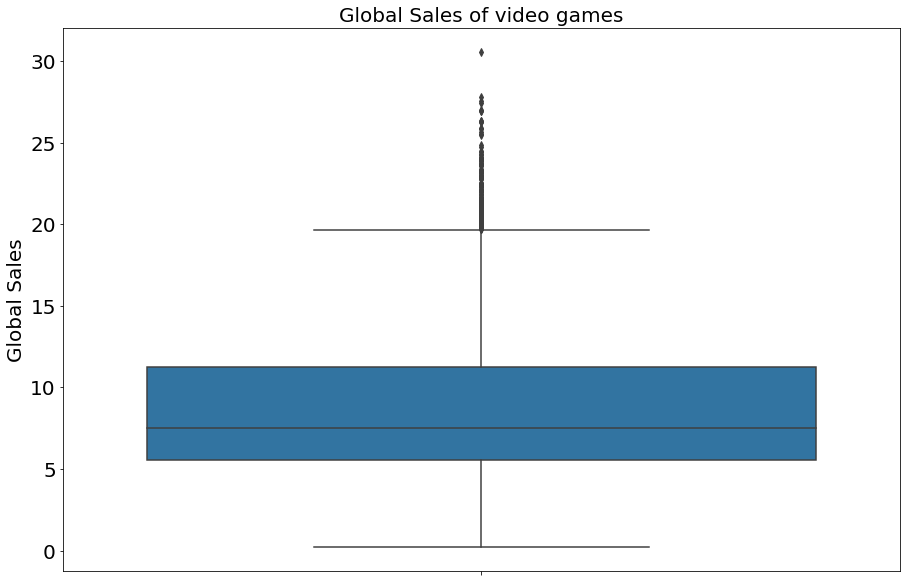

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y = data["Global_Sales"])
plt.yticks(fontsize=20)
plt.ylabel('Global Sales', fontsize=20)
plt.title('Global Sales of video games', fontsize=20)

What can we infer from this?

The 5 point estimates (approx.) here are:
  - Minimum, excluding outliers: 0
  - Maximum, excluding outliers: 6.5 million dollars
  - 25th Quantile: 2.5 million
  - Median: around 3 million
  - 75th Quantile: 4 million

<!-- The outliers always will appear either below the minimum or above the maximum -->

There are few outliers towards 6-7 million dollars

Key Takeaways:

Categorical - Barplot, Pie Chart

Numerical - Histogram, KDE, Boxplot 

Can explore more types: Violin plot, bee-swarm plot, etc.




## Bivariate Data Visualization

### Continous-Continous

So far we have been analyzing only a single feature.

But what if we want to visualize two features at once?


#### What kind of questions can we ask regarding a continous-continous pair of features?
- Maybe show relation between two features, like **how does the sales vary over the years**?
- Or show **how are the features associated, positively or negatively**?

...And so on

<!-- #### What is analyzing two features/columns together called?

**Bivariate analysis** -->

Let's go back to the line plot we plotted at the very beginning

### Line Plot

#### How can we plot the sales trend over the years for the longest running game?

First, let's find the longest running game first

In [ ]:
data['Name'].value_counts()

Ice Hockey                                       41
Baseball                                         17
Need for Speed: Most Wanted                      12
Ratatouille                                       9
FIFA 14                                           9
                                                 ..
Indy 500                                          1
Indy Racing 2000                                  1
Indycar Series 2005                               1
inFAMOUS                                          1
Zyuden Sentai Kyoryuger: Game de Gaburincho!!     1
Name: Name, Length: 11493, dtype: int64

Great, so `Ice Hockey` is longer running than most games

Let's try to find the sales trend in North America of the same across the years

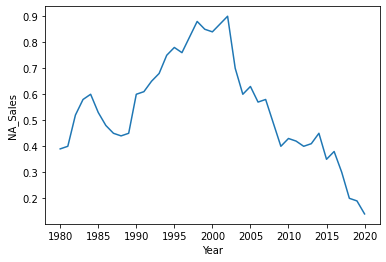

In [ ]:
ih = data.loc[data['Name']=='Ice Hockey']
sns.lineplot(x='Year', y='NA_Sales', data=ih)

#### What can we infer from this graph?

- The sales across North America seem to have been boosted in the years of 1995-2005
- Post 2010 though, the sales seem to have taken a dip

Line plot are great to represending trends such as above, over time

### Style and Labelling

We already learnt in barplot how to add **titles, x-label and y-label**

Let's add the same here



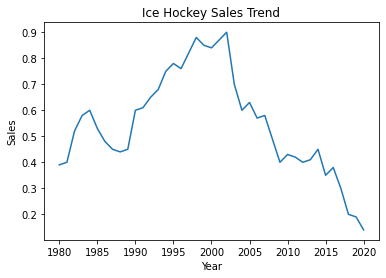

In [ ]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

<!-- #### How are these values useful though ?

- It gives **meaning of values** on x and y axis in **lables**
- Mention the purpose of plot using **title** -->

#### Now what if we want to change the colour of the curve ?

`sns.lineplot()` contains an argument **color**
- It takes as argument a matplotlib color

  OR
- as string for some defined colours like:
    - black: `k`/ `black`
    - red: `r`/`red` etc

**But what all colours can we use ?**

Matplotlib provides a lot of colours 
  
Check the documentation for more colours

https://matplotlib.org/2.0.2/api/colors_api.html


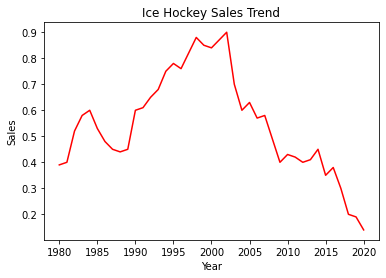

In [ ]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih, color='r')
plt.show()

Now, lets say we only want to show the values from years 1990-2000

#### How can we limit our plot to only the last decade of 20th century?

This requires changing the range of x-axis
  
#### But how can we change the range of an axis in matplotlib ?
 
We can use:
- `plt.xlim()`: x-axis
- `plt.ylim()`: y-axis

These funcs take same 2 args:
  1. `left`: Starting point of range
  2. `right`: End point of range


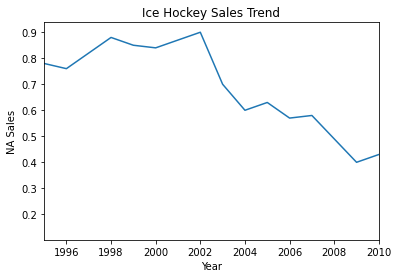

In [ ]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.xlim(left=1995,right=2010)
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()

So far we have visualised a single plot to understand it

**What if we want to compare it with some other plot?**

Say, we want to compare the same sales trend between two games
- Ice Hockey
- Baseball

Let's first plot the trend for "Baseball"


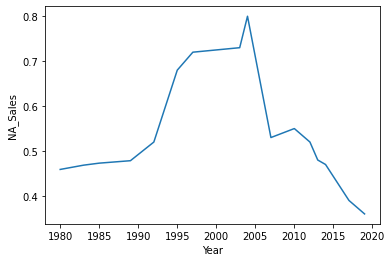

In [ ]:
baseball = data.loc[data['Name']=='Baseball']
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

Now, to compare these, so we will have to draw these plots in the same figure

#### How can we plot multiple plots in the same figure ?



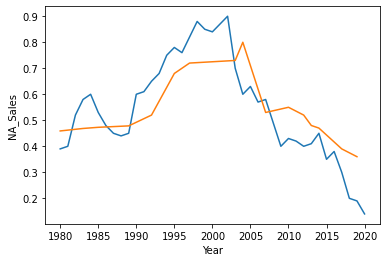

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

We can use multiple `sns.lineplot()` funcs

Observe:
  
Seaborn automatically created 2 plots with **different colors**

#### However how can we know which colour is of which plot ?
  - sns.lineplot() has another argument **label** to do so
  - We can simply set the label of each plot


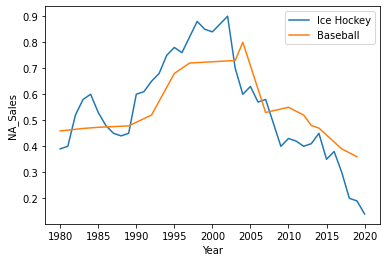

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')

We can also pass these labels in plt.legend() as a list in the order plots are done

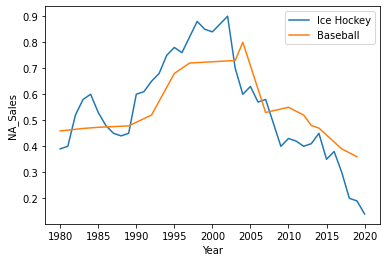

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'])
plt.show()

#### Now can we change the position of the legend, say, to bottom-right corner?

  - Matplotlib automatically decides the best position for the legends
  
  - But we can also change it using the `loc` parameter
  
  - `loc` takes input as 1 of following strings:
    - upper center
    - upper left
    - upper right
    - lower right ... etc
  

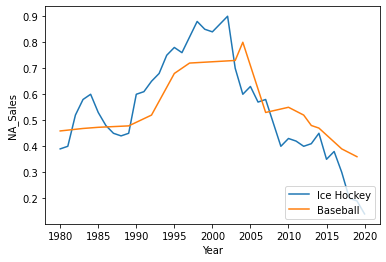

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower right')
plt.show()

#### Now what if we want the legend to be outside the plot?

Maybe the plot is too congested to show the legend

We can use the same `loc` parameter for this too

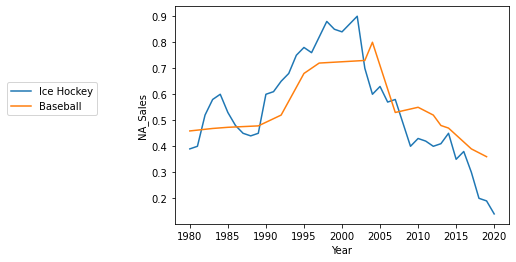

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc=(-0.5,0.5))
plt.show()

The pair of floats signify the (x,y) coordinates for the legend

==> From this we can conclude `loc` takes **two types of arguments**:
- The location in the **form of string**
- The location in the **form of coordinates**

#### What if we want to add other stylings to legends ?
For eg:
    
- Specify the **number of rows/cols**
  - Uses parameter `ncols` for this
  - The number of **rows are decided automatically**
    
- Decide if we want the box of legends to be displayed
  - Use the bool param `frameon`

and so on.


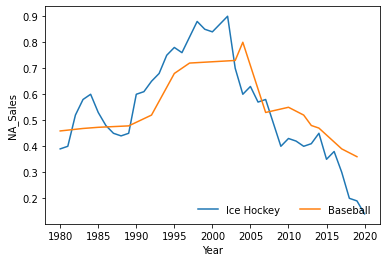

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower right', ncol = 2, frameon = False)
plt.show()

Now say we want to highlight a point on our curve.

For e.g.

#### How can we highlight the maximum "Ice Hockey" sales across all years ?

Let's first find this point


In [ ]:
print(max(ih['NA_Sales']))

0.9


If we observe, this point lies in the year 2004-5 around

Now we need to add text to this point (2004,0.9)

#### How can we add text to a point in a figure ?

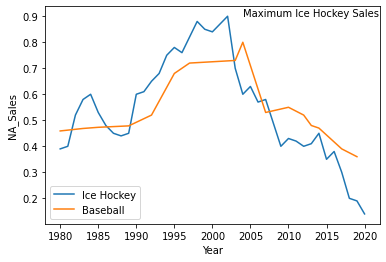

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower left')
plt.text(2004,max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.show()

By using `plt.text()`

  - Pass in the **x and y coordinates** where we want the text to appear

  - Pass in the **text string**

We can also use `plt.grid()` to show the grid layout in the background


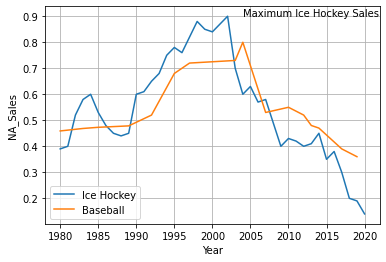

In [ ]:
sns.lineplot(x='Year', y='NA_Sales', data=ih)
sns.lineplot(x='Year', y='NA_Sales', data=baseball)
plt.legend(['Ice Hockey','Baseball'], loc='lower left')
plt.text(2004,max(ih['NA_Sales']), 'Maximum Ice Hockey Sales')
plt.grid()
plt.show()

Note:

We can **pass in parameters inside `plt.grid()` to control its density, colour of grid lines, etc.**


You can look it up later on how to customize the grid 

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

### Scatter Plot

Now suppose we want to find the relation between `Rank` and `Sales` of all games.

#### Are `Rank` and `Sales` positively or negatively correlated?

In this case, unlike line plot, there maybe multiple points in y-axis for each point in x-axis

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


#### How can we plot the relation between `Rank` and `Global Sales`?

Can we use lineplot? 

Let's try it out

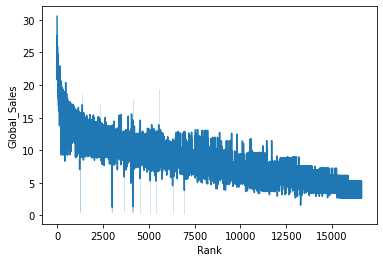

In [ ]:
sns.lineplot(data=data, x='Rank', y='Global_Sales')

The plot itself looks very messy and it's hard to find any patterns from it.

#### Is there any other way we can visualize this relation?

Use scatter plot

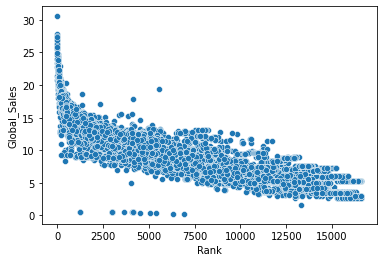

In [ ]:
sns.scatterplot(data=data, x='Rank', y='Global_Sales')

Compared to lineplot, we are able to see the patterns and points more distinctly now!

Notice,

- The two variables are negatively correlated with each other

- With increase in ranks, the sales tend to go down, implying, lower ranked games have higher sales overall!

Scatter plots help us visualize these relations and find any patterns in the data

Key Takeaways:

- For Continuous-Continuous Data => Scatter Plot, Line Plot

Sometimes, people also like to display the linear trend between two variables - Regression Plot, do check that